# #1(a)

In [6]:
from matplotlib import pyplot as plt

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.89295191],
       [3.14203802]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.89295191],
       [10.17702795]])

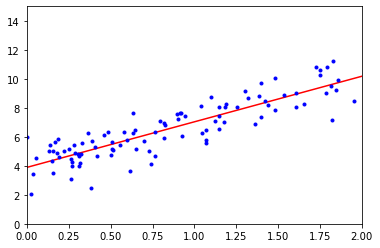

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89295191]), array([[3.14203802]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.89295191],
       [10.17702795]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.89295191],
       [3.14203802]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.89295191],
       [3.14203802]])

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [14]:
theta = np.random.randn(2,1)

In [16]:
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients

In [17]:
theta

array([[3.89295191],
       [3.14203802]])

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [19]:
def learning_schedule(t):
 return t0 / (t + t1)

In [20]:
theta = np.random.randn(2,1) # random initialization

In [22]:
for epoch in range(n_epochs):
 for i in range(m):
     random_index = np.random.randint(m)
     xi = X_b[random_index:random_index+1]
     yi = y[random_index:random_index+1]
     gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
     eta = learning_schedule(epoch * m + i)
     theta = theta - eta * gradients

In [23]:
theta

array([[3.92236935],
       [3.08439314]])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90882205]), array([3.15540792]))

In [26]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.34737713])

In [28]:
X_poly[0]

array([-0.34737713,  0.12067087])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92564124]), array([[0.96655845, 0.48593852]]))

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
     model.fit(X_train[:m], y_train[:m])
     y_train_predict = model.predict(X_train[:m])
     y_val_predict = model.predict(X_val)
     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
     val_errors.append(mean_squared_error(y_val, y_val_predict))
 plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
 plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

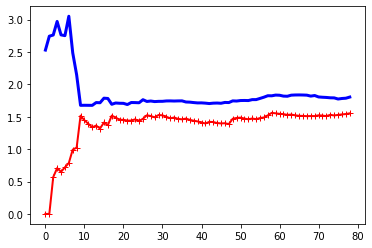

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

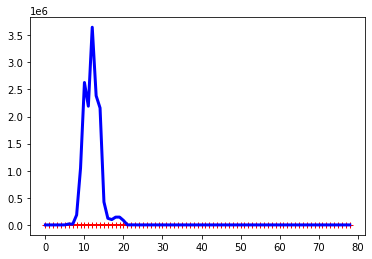

In [35]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.36692661]])

In [37]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.31198309])

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.30079835])

In [39]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.3133097])

In [43]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.base import clone
# prepare the data
poly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler())
 ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
 penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
     sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
     val_error = mean_squared_error(y_val, y_val_predict)
     if val_error < minimum_val_error:
         minimum_val_error = val_error
         best_epoch = epoch
         best_model = clone(sgd_reg)

C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fever\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [51]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

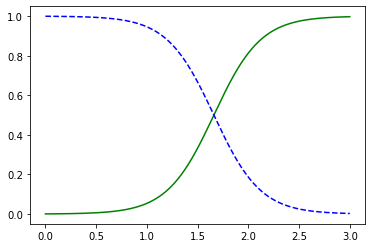

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# + more Matplotlib code to make the image look pretty

In [54]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [55]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [56]:
softmax_reg.predict([[5, 2]])

array([2])

In [58]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# #1(b)

In [60]:
#Let's import IRIS data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [61]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [62]:
print('iris.data.shape = ',iris.data.shape) 
print('iris.target.shape = ',iris.target.shape) 

iris.data.shape =  (150, 4)
iris.target.shape =  (150,)


In [63]:
type(iris.data)

numpy.ndarray

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
X = iris.data[:, (2,3)]
y = iris.target

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C =10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [66]:
softmax_reg.predict([[5,2]])

array([2])

In [67]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [68]:
import numpy as np
np.bincount(y)

array([50, 50, 50], dtype=int64)

In [69]:
# Add a bias term in X
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [70]:
# Dividing into train-val-test

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [71]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [72]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [73]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [74]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [75]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 3.698095479043258
500 0.9434403373373618
1000 0.7931241307280067
1500 0.6951921434178805
2000 0.6284693061912652
2500 0.5803937409931724
3000 0.5439179897270101
3500 0.5150373717266439
4000 0.49138277845877365
4500 0.4714851015583713
5000 0.45439086755456515


In [76]:
Theta

array([[ 3.59310413,  0.59764186, -1.79626162],
       [-0.32296345,  0.50448656,  0.48152884],
       [-2.49582163, -1.09570636,  0.59030044]])

In [77]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

In [78]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.394382222647497
500 0.5759941467372349
1000 0.5423402383021858
1500 0.5326490831490526
2000 0.5290888455623123
2500 0.52766777202949
3000 0.527076703566199
3500 0.5268250207764407
4000 0.5267163135434572
4500 0.5266689381385474
5000 0.5266481726181029


In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

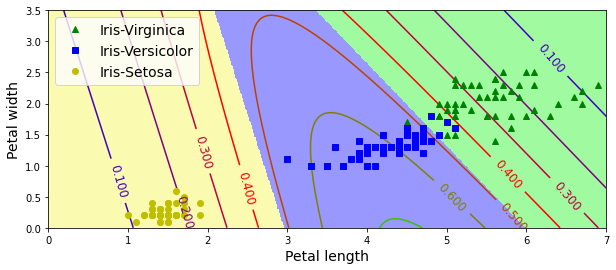

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# #1(c)

a. 첫째, 페널티 항을 추가하면 과적합이 줄어든다. 둘째, 페널티 항은 solution을 찾는데 확실성을 부여한다.

b. Ridge 회귀는 계수를 0으로 만들 수 없다. 따라서 모델의 모든 계수를 포함하거나 전혀 포함하지 않게 된다. 이는 적합하지 않은 모형을 나타낼 수 있다. 반면 LASSO는 매개변수 축소와 변수 선택을 모두 자동으로 수행하여 효과적이다.

c. 일부 공변량의 상관관계가 높은 경우 LASSO 대신 Elastic Net이 더 적합할 수 있다.

# #2(a)

In [6]:
from matplotlib import pyplot as plt

In [81]:
import numpy as np
X = np.random.rand(100, 1)
y = 4 * X + np.random.randn(100, 1)

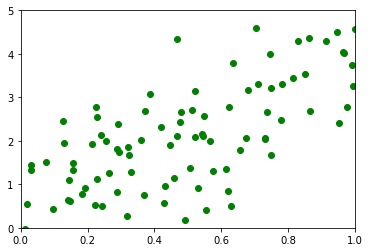

In [86]:
plt.scatter(X, y, c='green')
plt.axis([0, 1, 0, 5])
plt.show()

# #2(b)

In [87]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [88]:
theta_best

array([[0.31899958],
       [3.32408468]])

# #2(c)

In [105]:
X_sample = np.random.rand(100, 1)
y_sample = 4 * X + np.random.randn(100, 1)

In [106]:
def min_sq_error(y, x, w_1, w_0):
    
    y_pred = [w_1*x[i] + w_0 for i in range(len(x))]
    E = [y_pred[i] - y[i] for i in range(len(y))]
    sum_squared_error = np.sum(np.power(E, 2))
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y_sample, X_sample, theta_best[1], theta_best[0]))

8.380830122634578


# #2(d)

In [119]:
import pandas as pd

In [107]:
n_iterations = 80

In [108]:
X_b = np.c_[np.ones((3, 1)), X[0:3]] # add x0 = 1 to each instance

In [109]:
X_b

array([[1.        , 0.01193103],
       [1.        , 0.32057341],
       [1.        , 0.09412967]])

In [110]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y[0:3])

In [111]:
theta_best

array([[-0.62086612],
       [ 7.16452703]])

In [129]:
mse = []
p = []

In [130]:
for iteration in range(n_iterations):
    X_b = np.c_[np.ones((iteration+2, 1)), X[0:iteration+2]] # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y[0:iteration+2])
    mse.append(min_sq_error(y_sample, X_sample, theta_best, theta_best))
    p.append(iteration)

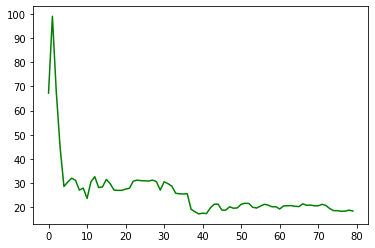

In [133]:
plt.plot(p, mse, c='green')
plt.show()

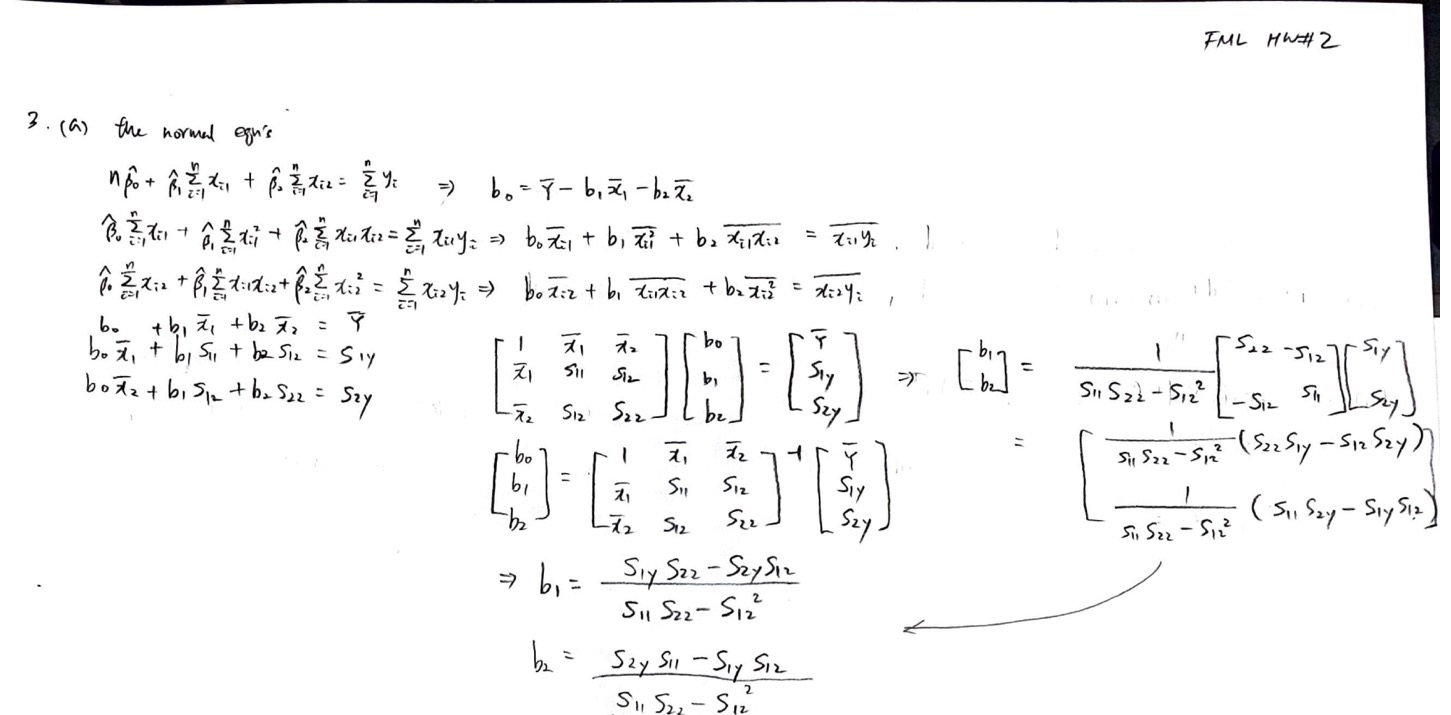

In [21]:
from IPython.display import Image
Image("hw2(3).jpg")

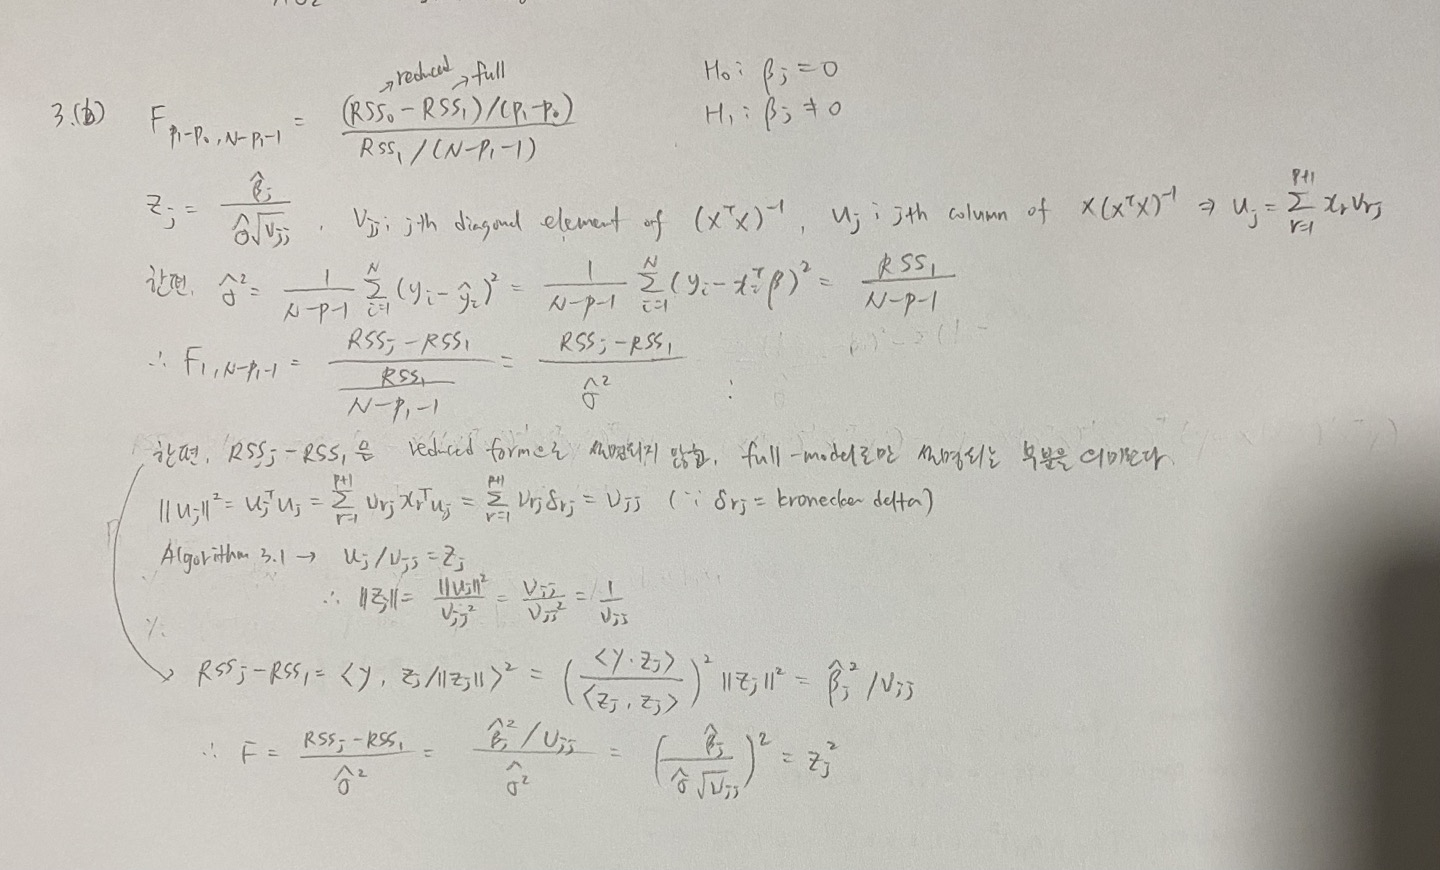

In [20]:
Image("hw2.3(b).jpg")

# Loss functions

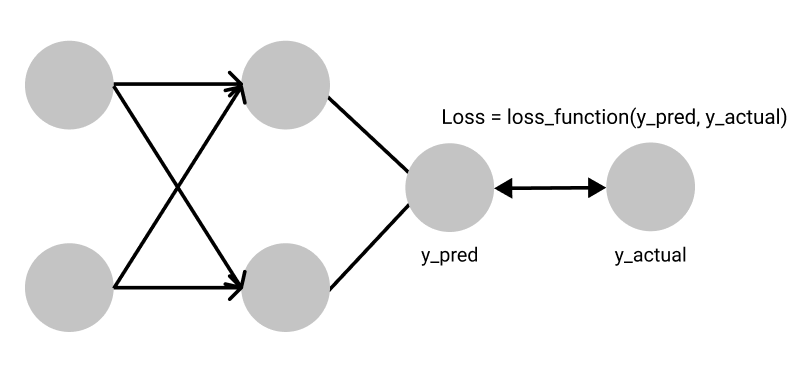

In [3]:
Image("loss_concept.png")

In [5]:
conda install pytorch torchvision -c pytorch 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\fever\Anaconda3

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py38haa95532_0         926 KB
    cudatoolkit-11.3.1         |       h59b6b97_2       545.3 MB
    libuv-1.40.0               |       he774522_0         255 KB
    pytorch-1.12.1             |py3.8_cuda11.3_cudnn8_0        1.19 GB  pytorch
    pytorch-mutex-1.0          |             cuda           3 KB  pytorch
    torchvision-0.13.1         |       py38_cu113         7.4 MB  pytorch
    ------------------------------------------------------------
                                           Total:        1.74 GB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-11.3.1-h59b6b97_2
  libuv         


cudatoolkit-11.3.1   | 545.3 MB  | #######8   |  79% 
cudatoolkit-11.3.1   | 545.3 MB  | #######8   |  79% 
cudatoolkit-11.3.1   | 545.3 MB  | #######9   |  79% 
cudatoolkit-11.3.1   | 545.3 MB  | #######9   |  79% 
cudatoolkit-11.3.1   | 545.3 MB  | #######9   |  80% 
cudatoolkit-11.3.1   | 545.3 MB  | #######9   |  80% 
cudatoolkit-11.3.1   | 545.3 MB  | ########   |  80% 
cudatoolkit-11.3.1   | 545.3 MB  | ########   |  80% 
cudatoolkit-11.3.1   | 545.3 MB  | ########   |  80% 
cudatoolkit-11.3.1   | 545.3 MB  | ########   |  81% 
cudatoolkit-11.3.1   | 545.3 MB  | ########   |  81% 
cudatoolkit-11.3.1   | 545.3 MB  | ########1  |  81% 
cudatoolkit-11.3.1   | 545.3 MB  | ########1  |  81% 
cudatoolkit-11.3.1   | 545.3 MB  | ########1  |  82% 
cudatoolkit-11.3.1   | 545.3 MB  | ########1  |  82% 
cudatoolkit-11.3.1   | 545.3 MB  | ########1  |  82% 
cudatoolkit-11.3.1   | 545.3 MB  | ########2  |  82% 
cudatoolkit-11.3.1   | 545.3 MB  | ########2  |  82% 
cudatoolkit-11.3.1   | 545.

pytorch-1.12.1       | 1.19 GB   | ####2      |  42% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  42% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  42% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  42% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  42% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####2      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  43% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  44% 
pytorch-1.12.1       | 1.19 GB   | ####3      |  44% 
pytorch-1.12.1       | 1.19 

In [9]:
import torch
import torchvision

In [6]:
import torch.nn as nn
MSE_loss_fn = nn.MSELoss()

# L1 loss function (MAE)

In [11]:
import torch.nn as nn

#size_average and reduce are deprecated

#reduction specifies the method of reduction to apply to output. Possible values are 'mean' (default) where we compute the average of the output, 'sum' where the output is summed and 'none' which applies no reduction to output

Loss_fn = nn.L1Loss(size_average=None, reduce=None, reduction='mean')

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = Loss_fn(input, target)
print(output) #tensor(0.7772, grad_fn=<L1LossBackward>)

tensor(1.1584, grad_fn=<L1LossBackward0>)


# Mean Squared Error

In [12]:
import torch.nn as nn

loss = nn.MSELoss(size_average=None, reduce=None, reduction='mean')
#L1 loss function parameters explanation applies here.

input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
print(output) #tensor(0.9823, grad_fn=<MseLossBackward>)

tensor(3.5164, grad_fn=<MseLossBackward0>)


# Cross Entropy Loss

In [13]:
import numpy as np

np.exp(34) #583461742527454.9
np.exp(-34) #1.713908431542013e-15

1.713908431542013e-15

# Negative Log-Likelihood Loss

In [14]:
m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)
output.backward()
# 2D loss example (used, for example, with image inputs)
N, C = 5, 4
loss = nn.NLLLoss()
# input is of size N x C x height x width
data = torch.randn(N, 16, 10, 10)
conv = nn.Conv2d(16, C, (3, 3))
m = nn.LogSoftmax(dim=1)
# each element in target has to have 0 <= value < C
target = torch.empty(N, 8, 8, dtype=torch.long).random_(0, C)
output = loss(m(conv(data)), target)
print(output) #tensor(1.4892, grad_fn=<NllLoss2DBackward>)

#credit NLLLoss — PyTorch 1.9.0 documentation

tensor(1.4817, grad_fn=<NllLoss2DBackward0>)


# Binary Cross Entropy Loss

In [15]:
import torch
import torch.nn as nn

target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 1.5)  # A prediction (logit)
pos_weight = torch.ones([64])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
loss = criterion(output, target)  # -log(sigmoid(1.5))
print(loss) #tensor(0.2014)

tensor(0.2014)


# Kullback-Leibler Divergence loss

In [16]:
import torch.nn as nn

loss = nn.KLDivLoss(size_average=None, reduce=None, reduction='mean', log_target=False)
input1 = torch.randn(3, 6, requires_grad=True)
input2 = torch.randn(3, 6, requires_grad=True)
output = loss(input1, input2)

print('output: ', output) #tensor(-0.0284, grad_fn=<KlDivBackward>)

output:  tensor(-0.0930, grad_fn=<KlDivBackward0>)


C:\Users\fever\Anaconda3\lib\site-packages\torch\nn\functional.py:2904: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
